### This script contains:

#### 1. Import libraries & datasets
#### 2. Panda and User subset setup
#### 3. Create 'Region' Flag
#### 4. Compare spending habits in the different regions
#### 5. Make Groupings - Age
#### 6. Make Groupings - Income
#### 7. Make Groupings - Parent/Non-Parent
#### 8. Confirm the new flags
#### 9. Export Dataframes
#### 10. Create Charts - Users/Income Groups
#### 11. Create Charts - Customers in each Loyalty Group - Percentages
#### 12. Create Charts - Users per Region - Percentages
#### 13. Create Charts - Parents/Non-parents - Percentages
#### 14. Create Charts - Users/Income Groups - Percentages
#### 15. Aggregate the max, mean, and min variables on a customer-profile level
#### 16. Import and merge Departments dataset and current dataset
#### 17. Create Charts - Top Departments
#### 18. Create Charts - Age Groupings by Region
#### 19. Create Charts - Products ordered by income groups (Full Dataset) - Percentages
#### 20. Create Charts - Products ordered by income groups (By Region) - Percentages
#### 21. Create Charts - Products ordered by Customer Loyalty (By Region) - Percentages
#### 22. Create Charts - Top Departments - By Region
#### 23. Create Charts - Orders in each Dept, by Region
#### 24. Task for CFO
#### 25. Exporting final dataframe

### 1. Importing libraries and datasets

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Folder path into usable string
path = r'C:\Users\willm\Instacart Basket Analysis'

In [3]:
#Import 4.9 pickle Dataset
df10ex = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '49_df_combined.pkl'))

### 2. Panda and User subset setup

In [4]:
#Make Panda show all columns when Head or Tail requested
pd.options.display.max_columns = None

In [5]:
%%time
#Creating a subset of the individual users
#This allows us to show outputs in real customer numbers, while making changes to the whole dataframe if needed
df10exuser = df10ex.drop_duplicates(subset = ["user_id"])

Wall time: 1.92 s


In [6]:
#Confirming the count equals the ammount of customers we had in our original customers file - 206,209
df10exuser.describe()

,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,reordered,aisle_id,department_id,prices,max_order,spend_group,days_since_last_order_median,age,children,income
count,206209.000000,206209.000000,206209.000000,144417.0,206209.000000,206209.0,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206208.000000,206209.000000,206209.000000,206209.000000
mean,5.680305,2.742286,13.554709,NaN,24777.771179,0.0,46.173247,7.346808,NaN,15.590256,NaN,NaN,49.501646,1.499823,94632.852548
std,8.443437,2.083326,4.230547,0.0,14522.896969,0.0,34.203953,5.636049,0.000000,16.654823,0.000000,0.000000,18.480962,1.118433,42473.786988
min,1.000000,0.000000,0.000000,0.0,1.000000,0.0,-128.000000,1.000000,1.000000,1.000000,1.000000,0.000000,18.000000,0.000000,25903.000000
25%,1.000000,1.000000,10.000000,6.0,13176.000000,0.0,24.000000,4.000000,4.398438,5.000000,7.222656,9.546875,33.000000,0.000000,59874.000000
50%,3.000000,3.000000,14.000000,13.0,21573.000000,0.0,24.000000,4.000000,9.000000,9.000000,7.789062,14.687500,49.000000,1.000000,93547.000000
75%,6.000000,5.000000,17.000000,28.0,38444.000000,0.0,77.000000,11.000000,10.296875,19.000000,8.328125,20.718750,66.000000,3.000000,124244.000000
max,99.000000,6.000000,23.000000,30.0,49683.000000,0.0,127.000000,21.000000,25.000000,99.000000,23.203125,30.000000,81.000000,3.000000,593901.000000


### 3. Creating 'Region' Flag

In [7]:
#Checking to see the state names in our dataframe, along with 'counts' to spot any issues
df10exuser['state'].value_counts(dropna = False)

Alabama                 4044
Arizona                 4044
California              4044
Florida                 4044
Colorado                4044
District of Columbia    4044
Georgia                 4044
Arkansas                4044
Indiana                 4044
Alaska                  4044
Idaho                   4044
Illinois                4044
Hawaii                  4044
Delaware                4044
Connecticut             4044
Iowa                    4044
New Jersey              4043
Rhode Island            4043
Washington              4043
Louisiana               4043
Mississippi             4043
Texas                   4043
New Mexico              4043
Missouri                4043
Montana                 4043
Wyoming                 4043
New Hampshire           4043
Massachusetts           4043
Pennsylvania            4043
Wisconsin               4043
West Virginia           4043
North Dakota            4043
South Carolina          4043
Utah                    4043
Oklahoma      

In [8]:
#Divide States into Regions
result = []
for value in df10ex['state']:
    if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value =='New Jersey'):
        result.append('Northeast')
    elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):
        result.append('Midwest')
    elif (value == 'Idaho') or (value == 'Montana') or (value == 'Wyoming') or (value == 'Nevada') or (value == 'Utah') or (value == 'Colorado') or (value == 'Arizona') or (value == 'New Mexico') or (value == 'Alaska') or (value == 'Washington') or (value == 'Oregon') or (value == 'California') or (value == 'Hawaii'):
        result.append('West')
    else:
        result.append('South')

In [9]:
#Creating column to show region
df10ex['region'] = result

In [10]:
#Creating a subset of the individual users
df10exuser = df10ex.drop_duplicates(subset = ["user_id"])

In [11]:
#Checking the count of the regions in the 'region' column
df10exuser['region'].value_counts(dropna = False)

South        68737
West         52565
Midwest      48519
Northeast    36388
Name: region, dtype: int64

In [12]:
#Checking the count of the regions in the 'region' column
#This shows the ammount of individual items ordered
df10ex['region'].value_counts(dropna = False)

South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: region, dtype: int64

In [13]:
df10exuser.shape

(206209, 31)

In [14]:
#Checking to find if 'region' column has any Null entries
df10exuser.isnull().sum()

order_id                            0
user_id                             0
order_number                        0
orders_day_of_week                  0
order_hour_of_day                   0
days_since_prior_order          61792
first_order                         0
product_id                          0
reordered                           0
product_name                        0
aisle_id                            0
department_id                       0
prices                              0
price_range_loc                     0
busiest_day                         0
busiest_period_of_day               0
max_order                           0
loyalty_flag                        0
spend_group                         0
spend_flag                          0
days_since_last_order_median        1
order_frequency_flag                1
gender                              0
state                               0
age                                 0
date_joined                         0
children    

### 4. Comparing spending habits in the different regions

In [15]:
#Creating a crosstab of 'region' and 'spend_flag'
crosstabuser = pd.crosstab(df10exuser['region'],df10exuser['spend_flag'],dropna = False)

In [16]:
#Checking the results of the crosstab
crosstabuser

spend_flag,High spender,Low spender
region,,
Midwest,801,47718
Northeast,545,35843
South,1141,67596
West,902,51663


In [17]:
#Calling up the counts of each 'region' for ease of typing below
df10exuser['region'].value_counts(dropna = False)

South        68737
West         52565
Midwest      48519
Northeast    36388
Name: region, dtype: int64

In [18]:
#Getting the percentage of High Spenders for South region
South = (1817/68737)*100

In [19]:
South

2.643408935507805

In [20]:
#Getting the percentage of High Spenders for West region
West = (1394/52565)*100

In [21]:
West

2.651954722724246

In [22]:
#Getting the percentage of High Spenders for Midwest region
Midwest = (1263/48519)*100

In [23]:
Midwest

2.603103938663204

In [24]:
#Getting the percentage of High Spenders for Northeast region
Northeast = (883/36388)*100

In [25]:
Northeast

2.4266241618115862

#### Using the Big Spenders numbers we can see that the percentage of customers per each region that are big spenders ranges from 2.42% to 2.65%. Therefore we have determined that there is no real difference in the spending habits of customers in each region.

### 5. Making Age Groupings 
#### Using full dataframe until presentation of actual numbers needed

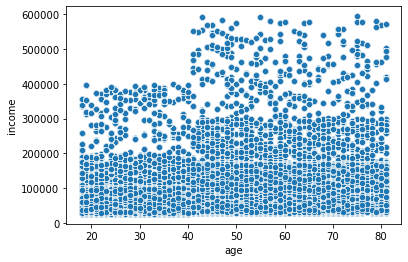

In [26]:
%%time
#Re-running a Scatterplot I did in T9 as it accurately shows distinct age groups by income range
#Creating a scatterplot to see if the age of a customer affects their spending power
splot2 = sns.scatterplot(x = 'age', y = 'income',data = df10ex)

#### This shows that people aged under 40 have incomes that range up to 400k, with most being under 200k per year. And that people aged over 40 have incomes that range up to 600k, with most being under 300k.

In [26]:
#Confirming the lowest and highest age of our customers - 18 & 81
df10ex['age'].describe()

count    3.239973e+07
mean     4.946528e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

#### I will now split out the customers into 3 different age groups: 18-39, 40-59 and 60-81

In [27]:
#Creating age groups
age_group = []
for value in df10ex['age']:
    if value <= 39:
        age_group.append('G1 up to 39')
    elif (value > 39) and (value <= 59):
        age_group.append('G2 40-59')
    elif (value > 59):
        age_group.append('G3 60 or more')
    else:
        result.append('age issue')

In [28]:
#Creating the new age_group column
df10ex['age_group'] = age_group

In [29]:
#Checking entries of new age_group column - by amount of products ordered
df10ex['age_group'].value_counts(dropna = False).sort_index()

G1 up to 39      11162448
G2 40-59         10171755
G3 60 or more    11065529
Name: age_group, dtype: int64

In [30]:
#Creating a subset of the individual users
df10exuser = df10ex.drop_duplicates(subset = ["user_id"])

In [31]:
#Checking entries of new age_group column - by amount of individual users
df10exuser['age_group'].value_counts(dropna = False).sort_index()

G1 up to 39      70766
G2 40-59         64716
G3 60 or more    70727
Name: age_group, dtype: int64

#### Note: The lower age and higher age were left open so that this script may be run again, when the age profiles may have changed

### 6. Making Income Groupings

In [32]:
#Creating income groups starting at 0-25, increasing by 25k until 100k, then by 50k until 300k, and then by 100k.
#500k+ covers all above 500k, incase our customer profile changes to incomes over 600k
#0 at the start of the lower groupings helps with viewing the index
income = []
for value in df10ex['income']:
    if value < 25000: 
        income.append('0-24k')
    elif (value > 24000) and (value <= 49000):
        income.append('025-49k')
    elif (value > 49000) and (value <= 74000):
        income.append('050-74k')
    elif (value > 74000) and (value <= 99000):
        income.append('075-99k')
    elif (value > 99000) and (value <= 149000):
        income.append('100-149k')
    elif (value > 149000) and (value <= 199000):
        income.append('150k-199k')
    elif (value > 199000) and (value <= 249000):
        income.append('200-249k')
    elif (value > 249000) and (value <= 299000):
        income.append('250k-299k')
    elif (value > 299000) and (value <= 399000):
        income.append('300k-399k')
    elif (value > 399000) and (value <= 499000):
        income.append('400k-499k')
    elif (value > 500000):
        income.append('500k+')
    else: 
        income.append('income issue')

In [33]:
#Creating the new income_group column
df10ex['income_group'] = income

In [34]:
#Checking entries of new income_group column - by amount of products ordered
df10ex['income_group'].value_counts(dropna = False).sort_index()

025-49k       3455067
050-74k       6692777
075-99k       7020306
100-149k     10997960
150k-199k     3977470
200-249k        74843
250k-299k       78834
300k-399k       55247
400k-499k       28041
500k+           19187
Name: income_group, dtype: int64

In [35]:
#Creating a subset of the individual users
df10exuser = df10ex.drop_duplicates(subset = ["user_id"])

In [36]:
#Checking entries of new income_group column - by amount of individual users
df10exuser['income_group'].value_counts(dropna = False).sort_index()

025-49k      32902
050-74k      42223
075-99k      41373
100-149k     65379
150k-199k    23324
200-249k       307
250k-299k      314
300k-399k      204
400k-499k      113
500k+           70
Name: income_group, dtype: int64

### 7. Making Parent/Non-Parent Groupings

In [37]:
#Creating parent/non parent groups
df10ex.loc[df10ex['children'] == 0, 'parent_status'] = 'non parent'
df10ex.loc[df10ex['children'] >= 1, 'parent_status'] = 'parent'

In [38]:
#Checking the new parent_status column - by amount of products ordered
df10ex['parent_status'].value_counts(dropna = False)

parent        24303457
non parent     8096275
Name: parent_status, dtype: int64

In [39]:
#Creating a subset of the individual users
df10exuser = df10ex.drop_duplicates(subset = ["user_id"])

In [40]:
#Checking the new parent_status column - by amount of individual users
df10exuser['parent_status'].value_counts(dropna = False)

parent        154607
non parent     51602
Name: parent_status, dtype: int64

### 8. Confirming the new flags

In [41]:
#Final confirmation of the Column titles, and the data being displayed in them
df10ex.tail(30)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,spend_group,spend_flag,days_since_last_order_median,order_frequency_flag,gender,state,age,date_joined,children,f_status,income,_merge,region,age_group,income_group,parent_status
32399702,259165,106143,1,2,21,NaN,First Order,19675,0,Organic Raspberry Black Tea,94,7,10.703125,Mid-range product,Regularly busy,Average orders,26,Regular customer,10.703125,High spender,7.640625,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,G1 up to 39,050-74k,non parent
32399703,2738626,106143,2,3,17,8.0,Repeat Customer,19675,1,Organic Raspberry Black Tea,94,7,10.703125,Mid-range product,Slowest days,Average orders,26,Regular customer,10.703125,High spender,7.640625,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,G1 up to 39,050-74k,non parent
32399704,218446,106143,3,4,0,8.0,Repeat Customer,19675,1,Organic Raspberry Black Tea,94,7,10.703125,Mid-range product,Slowest days,Fewest orders,26,Regular customer,10.703125,High spender,7.640625,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,G1 up to 39,050-74k,non parent
32399705,2645700,106143,4,3,21,6.0,Repeat Customer,19675,1,Organic Raspberry Black Tea,94,7,10.703125,Mid-range product,Slowest days,Average orders,26,Regular customer,10.703125,High spender,7.640625,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,G1 up to 39,050-74k,non parent
32399706,42576,106143,5,3,22,7.0,Repeat Customer,19675,1,Organic Raspberry Black Tea,94,7,10.703125,Mid-range product,Slowest days,Average orders,26,Regular customer,10.703125,High spender,7.640625,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,G1 up to 39,050-74k,non parent
32399707,1053604,106143,6,1,20,5.0,Repeat Customer,19675,1,Organic Raspberry Black Tea,94,7,10.703125,Mid-range product,Busiest days,Average orders,26,Regular customer,10.703125,High spender,7.640625,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,G1 up to 39,050-74k,non parent
32399708,2409631,106143,7,1,0,14.0,Repeat Customer,19675,1,Organic Raspberry Black Tea,94,7,10.703125,Mid-range product,Busiest days,Fewest orders,26,Regular customer,10.703125,High spender,7.640625,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,G1 up to 39,050-74k,non parent
32399709,1943329,106143,8,1,1,7.0,Repeat Customer,19675,1,Organic Raspberry Black Tea,94,7,10.703125,Mid-range product,Busiest days,Fewest orders,26,Regular customer,10.703125,High spender,7.640625,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,G1 up to 39,050-74k,non parent
32399710,477467,106143,9,5,2,4.0,Repeat Customer,19675,1,Organic Raspberry Black Tea,94,7,10.703125,Mid-range product,Regularly busy,Fewest orders,26,Regular customer,10.703125,High spender,7.640625,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,G1 up to 39,050-74k,non parent
32399711,2835422,106143,10,2,11,11.0,Repeat Customer,19675,1,Organic Raspberry Black Tea,94,7,10.703125,Mid-range product,Regularly busy,Most orders,26,Regular customer,10.703125,High spender,7.640625,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,G1 up to 39,050-74k,non parent


### 9. Exporting the dataframes

In [43]:
#Exporting current DF
df10ex.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4-10-5pkl'))

In [44]:
#Exporting current 'user' DF
df10exuser.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4-10-5-users-pkl'))

### 10. Creating Charts - Users/Income Groups

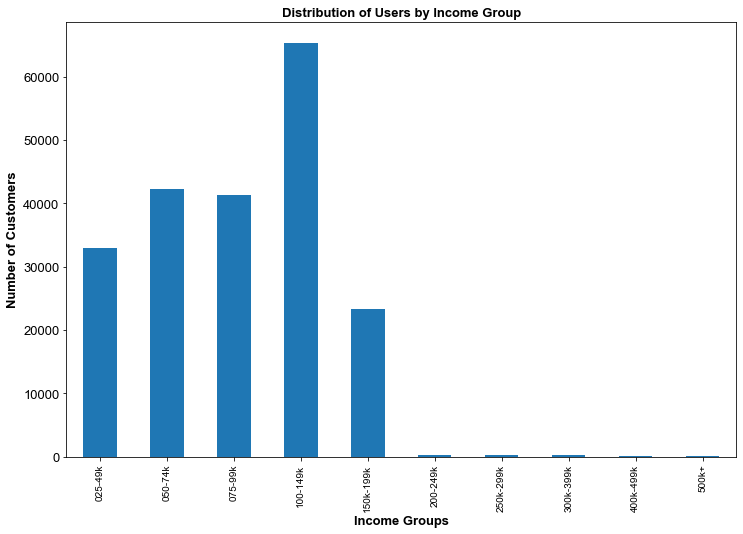

In [42]:
#Bar chart of the income_group
bar_income_group = df10exuser['income_group'].value_counts().sort_index().plot.bar(figsize = (12,8))
sns.set_style('ticks')
plt.xlabel('Income Groups',fontsize=13, fontweight = 'bold')
plt.ylabel('Number of Customers',fontsize=13, fontweight = 'bold')
plt.title('Distribution of Users by Income Group',fontsize=13, fontweight = 'bold')
plt.yticks(fontsize = 13)
plt.show()

### 11. Creating Charts - Customers in each Loyalty Group - Percentages

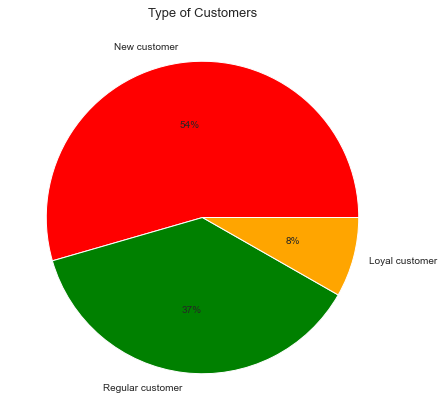

In [43]:
#Pie chart of percentages of customer type groups
colour = ['red', 'green', 'orange']
custpie = df10exuser['loyalty_flag'].value_counts().plot.pie(figsize = (7,8), colors = colour, autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Type of Customers', fontsize=13)
plt.show()

### 12. Creating Charts - Users per Region - Percentages

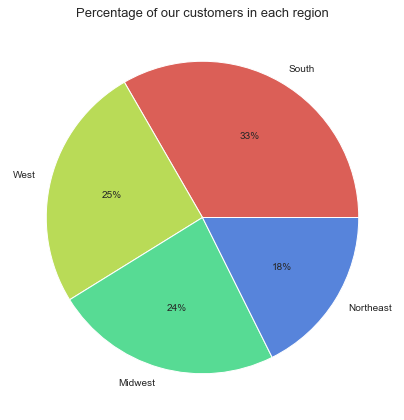

In [44]:
#Pie chart of the Percentage of our customers in each region
regionpie = df10exuser['region'].value_counts().plot.pie(figsize = (7,8), colors = sns.color_palette('hls', 5), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of our customers in each region',fontsize=13)
plt.show()

### 13. Creating Charts - Parents/Non-parents - Percentages

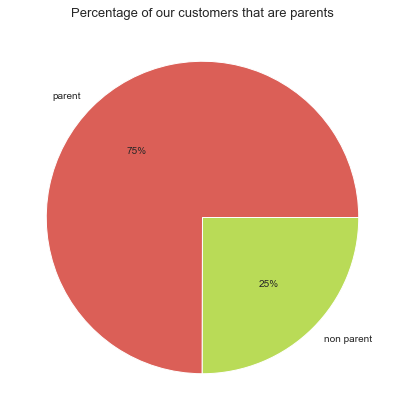

In [45]:
#Pie chart of the Percentage of our customers that are parents
parentpie = df10exuser['parent_status'].value_counts().plot.pie(figsize = (7,8), colors = sns.color_palette('hls', 5), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of our customers that are parents',fontsize=13)
plt.show()

### 14. Creating Charts - Users/Income Groups - Percentages

In [46]:
#Creating a new_income column to split out the income_group groups that are less than 1% of our total user dataset
#This new grouping will make the next pie chart more clear
new_income = []
for value in df10ex['income_group']:
    if (value == '0-24k') or (value == '200-249k') or (value == '250k-299k') or (value == '300k-399k') or (value == '400k-499k') or (value == '500k+'):
        new_income.append('Other')
    elif (value == '025-49k'):
        new_income.append('025-49k')
    elif (value == '050-74k'):
        new_income.append('050-74k')
    elif (value == '075-99k'):
        new_income.append('075-99k')
    elif (value == '100-149k'):
        new_income.append('100-149k')
    elif (value == '150k-199k'):
        new_income.append('150k-199k')
    else:
        new_income.append('ISSUE')

In [47]:
#Creating the new income_group column
df10ex['new_income'] = new_income

In [48]:
#Creating a subset of the individual users
df10exuser = df10ex.drop_duplicates(subset = ["user_id"])

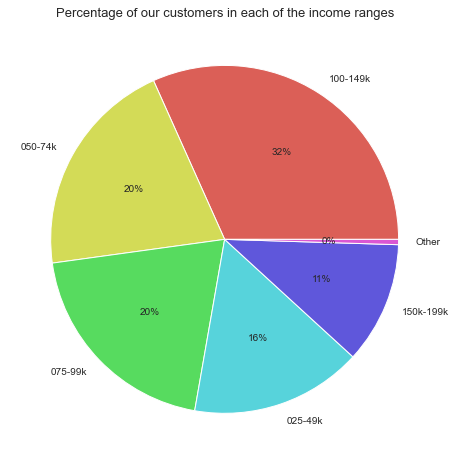

In [49]:
#Pie chart of the Percentage of our customers in each of the income ranges
income_grp_user_pie = df10exuser['new_income'].value_counts().plot.pie(figsize = (8,8), colors = sns.color_palette('hls', 6), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of our customers in each of the income ranges',fontsize=13)
plt.show()

In [50]:
#Saving images of the charts
bar_income_group.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_users_in_income_groups.png'))
custpie.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_custpie.png'))
regionpie.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_regionpie.png'))
parentpie.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_parentpie.png'))
income_grp_user_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_income_grp_user_pie.png'))

### 15. Aggregate the max, mean, and min variables on a customer-profile level

In [51]:
#Min, Max and Mean of the prices of products bought by each income group
df10ex.groupby('income_group').agg({'prices': ['min','max','mean']})

prices                
                min   max      mean
income_group                       
025-49k         1.0  25.0  6.679688
050-74k         1.0  25.0  7.800781
075-99k         1.0  25.0  7.964844
100-149k        1.0  25.0  7.964844
150k-199k       1.0  25.0  7.957031
200-249k        1.0  25.0  7.781250
250k-299k       1.0  25.0  7.800781
300k-399k       1.0  25.0  7.769531
400k-499k       1.0  25.0  7.750000
500k+           1.0  25.0  7.726562

##### The income_groups 075-99k, 100-149k and 150-199k have the higest average price for products bought

In [52]:
#Min, Max and Mean of the max_order of products bought by each income group
df10exuser.groupby('income_group').agg({'max_order': ['min','max','mean']})

max_order               
                   min max       mean
income_group                         
025-49k              2  99  13.433560
050-74k              3  99  15.665775
075-99k              3  99  16.087497
100-149k             1  99  15.976583
150k-199k            2  99  16.253601
200-249k             3  99  22.000000
250k-299k            3  99  20.732484
300k-399k            3  99  23.965686
400k-499k            3  99  21.141593
500k+                3  99  23.457143

In [53]:
#Min, Max and Mean of the spend_group, by each income group
df10exuser.groupby('income_group').agg({'spend_group': ['min','max','mean']})

spend_group                     
                     min        max      mean
income_group                                 
025-49k         1.000000  13.875000  6.390625
050-74k         1.099609  14.765625  7.777344
075-99k         5.375000  23.203125  8.093750
100-149k        4.656250  20.000000  8.085938
150k-199k       4.433594  20.109375  8.085938
200-249k        4.371094  12.671875  7.781250
250k-299k       6.070312   9.906250  7.808594
300k-399k       5.304688   9.476562  7.714844
400k-499k       4.984375  10.320312  7.699219
500k+           6.304688   9.242188  7.812500

In [54]:
#Min, Max and Mean of the prices, by each age group
df10exuser.groupby('age_group').agg({'prices': ['min','max','mean']}).sort_index()

prices                     
                 min        max      mean
age_group                                
G1 up to 39      1.0  25.000000  7.812500
G2 40-59         1.0  25.000000  7.796875
G3 60 or more    1.0  24.203125  7.816406

### 16. Importing and merging Departments dataset and current dataset

In [55]:
#Importing the departments dataset I have already cleaned up
depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=0)

In [56]:
#Checking the depts dataset
depts.head(22)

,department_name
department_id,
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [57]:
%%time
#Merging the depts and df10ex datasets
df10wdepts = df10ex.merge(depts, on = 'department_id')

Wall time: 4min 28s


### 17. Creating Charts - Top Departments

In [58]:
#Checking how many items have been ordered from each department
df10wdepts['department_name'].value_counts(dropna = False)

produce            9479291
dairy eggs         5393620
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department_name, dtype: int64

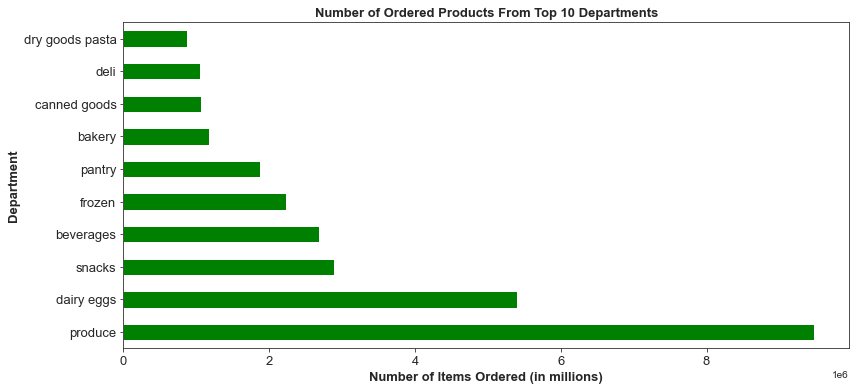

In [59]:
#Creating a bar chart of Top 10 departments
top_10_depts = df10wdepts['department_name'].value_counts().nlargest(10).plot.barh(figsize = (13,6), color = ['green'])
sns.set_style('ticks')
plt.xlabel('Number of Items Ordered (in millions)', fontsize = 13, fontweight = 'bold')
plt.ylabel('Department', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Number of Ordered Products From Top 10 Departments', fontsize = 13, fontweight = 'bold')
plt.show()

In [69]:
#Saving image of the chart
top_10_depts.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_top_10_depts.png'))

In [64]:
#Creating a subset of the individual users
df10wdeptsuser = df10wdepts.drop_duplicates(subset = ["user_id"])

### 18. Creating Charts - Age Groupings by Region

In [65]:
#Creating a crosstab of the regions and age groups
crosstab_region_age = pd.crosstab(df10wdeptsuser['region'], df10wdeptsuser['age_group'], dropna = False)

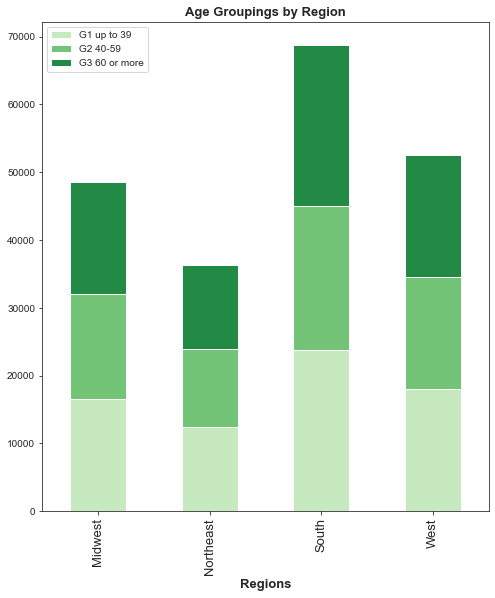

In [66]:
#Creating a stacked bar chart of the regions, divided up by the age groups
region_age = crosstab_region_age.plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens', 3), figsize = (8,9))
plt.legend(loc='upper left')
plt.xlabel('Regions', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.title('Age Groupings by Region', fontsize = 13, fontweight = 'bold')
plt.show()

In [67]:
#Saving image of the chart
region_age.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_region_age.png'))

### 19. Creating Charts - Products ordered by income groups (Full Dataset) - Percentages

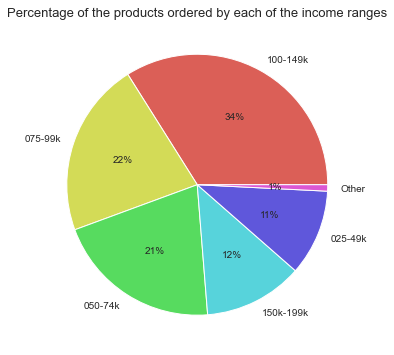

In [68]:
#Pie chart of the percentage of products ordered in each of the income ranges
income_grp_pie_d = df10wdepts['new_income'].value_counts().plot.pie(figsize = (6,6), colors = sns.color_palette('hls', 6), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of the products ordered by each of the income ranges',fontsize=13)
plt.show()

### 20. Creating Charts - Products ordered by income groups (By Region) - Percentages

In [62]:
#Creating a subset with just the 'Midwest' customers
midwest = df10wdepts[df10wdepts['region'] == 'Midwest']

In [63]:
#Creating a subset with just the 'West' customers
west = df10wdepts[df10wdepts['region'] == 'West']

In [64]:
#Creating a subset with just the 'Northeast' customers
northeast = df10wdepts[df10wdepts['region'] == 'Northeast']

In [65]:
#Creating a subset with just the 'South' customers
south = df10wdepts[df10wdepts['region'] == 'South']

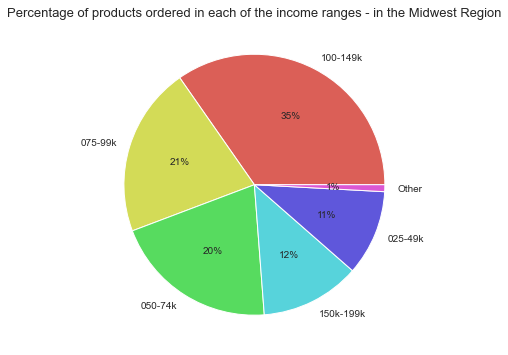

In [73]:
##Pie chart of the Percentage of products ordered in each of the income ranges - in the Midwest Region
midwest_income_grp = midwest['new_income'].value_counts().plot.pie(figsize = (8,6), colors = sns.color_palette('hls', 6), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of products ordered in each of the income ranges - in the Midwest Region',fontsize=13)
plt.show()

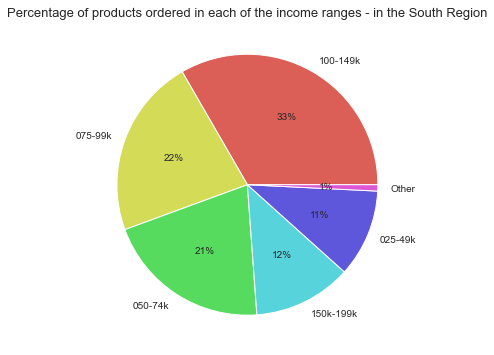

In [74]:
#Pie chart of the Percentage of products ordered in each of the income ranges - in the South Region
south_income_grp = south['new_income'].value_counts().plot.pie(figsize = (8,6), colors = sns.color_palette('hls', 6), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of products ordered in each of the income ranges - in the South Region',fontsize=13)
plt.show()

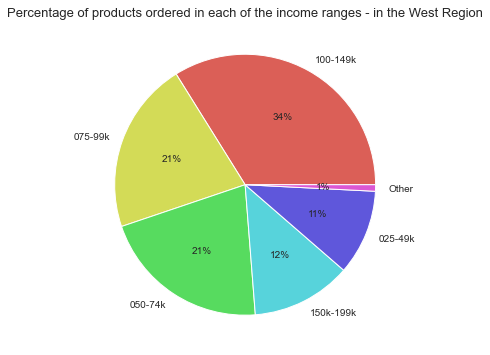

In [75]:
#Pie chart of the Percentage of products ordered in each of the income ranges - in the West Region
west_income_grp = west['new_income'].value_counts().plot.pie(figsize = (8,6), colors = sns.color_palette('hls', 6), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of products ordered in each of the income ranges - in the West Region',fontsize=13)
plt.show()

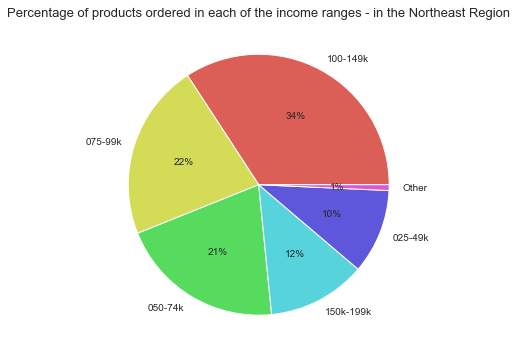

In [76]:
#Pie chart of the Percentage of our customers in each of the income ranges - in the Northeast Region
northeast_income_grp = northeast['new_income'].value_counts().plot.pie(figsize = (8,6), colors = sns.color_palette('hls', 6), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of products ordered in each of the income ranges - in the Northeast Region',fontsize=13)
plt.show()

In [77]:
#Saving images of the 5 pie charts
income_grp_pie_d.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_pie_income_grp.png'))
midwest_income_grp.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_midwest_income_grp.png'))
south_income_grp.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_south_income_grp.png'))
west_income_grp.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_west_income_grp.png'))
northeast_income_grp.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_northeast_income_grp.png'))

### 21. Creating Charts - Products ordered by Customer Loyalty (By Region) - Percentages

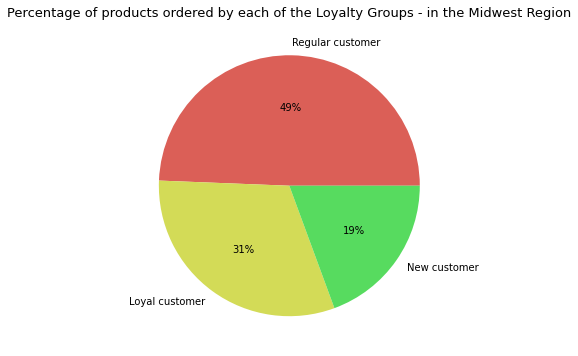

In [31]:
##Pie chart of the Percentage of products ordered by each of the Loyalty Groups - in the Midwest Region
midwest_loyalty_grp = midwest['loyalty_flag'].value_counts().plot.pie(figsize = (8,6), colors = sns.color_palette('hls', 6), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of products ordered by each of the Loyalty Groups - in the Midwest Region',fontsize=13)
plt.show()

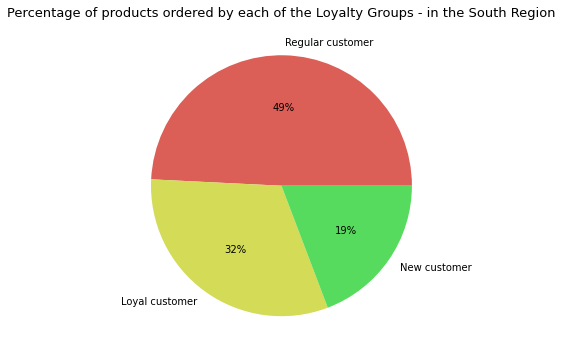

In [32]:
##Pie chart of the Percentage of products ordered by each of the Loyalty Groups - in the South Region
south_loyalty_grp = south['loyalty_flag'].value_counts().plot.pie(figsize = (8,6), colors = sns.color_palette('hls', 6), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of products ordered by each of the Loyalty Groups - in the South Region',fontsize=13)
plt.show()

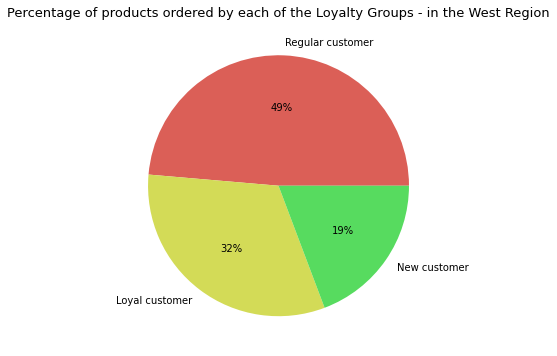

In [33]:
##Pie chart of the Percentage of products ordered by each of the Loyalty Groups - in the West Region
west_loyalty_grp = west['loyalty_flag'].value_counts().plot.pie(figsize = (8,6), colors = sns.color_palette('hls', 6), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of products ordered by each of the Loyalty Groups - in the West Region',fontsize=13)
plt.show()

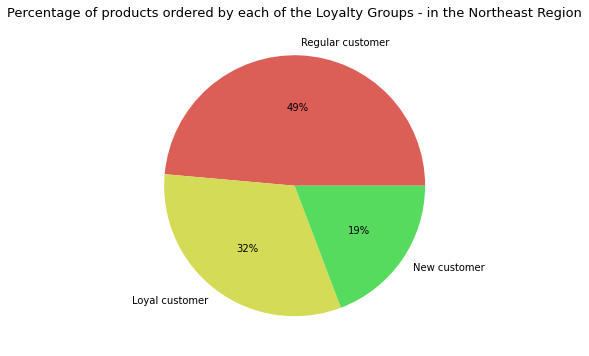

In [34]:
##Pie chart of the Percentage of products ordered by each of the Loyalty Groups - in the Northeast Region
northeast_loyalty_grp = northeast['loyalty_flag'].value_counts().plot.pie(figsize = (8,6), colors = sns.color_palette('hls', 6), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of products ordered by each of the Loyalty Groups - in the Northeast Region',fontsize=13)
plt.show()

In [35]:
#Saving images of the 4 pie charts
midwest_loyalty_grp.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_midwest_loyalty_grp.png'))
south_loyalty_grp.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_south_loyalty_grp.png'))
west_loyalty_grp.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_west_loyalty_grp.png'))
northeast_loyalty_grp.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_northeast_loyalty_grp.png'))

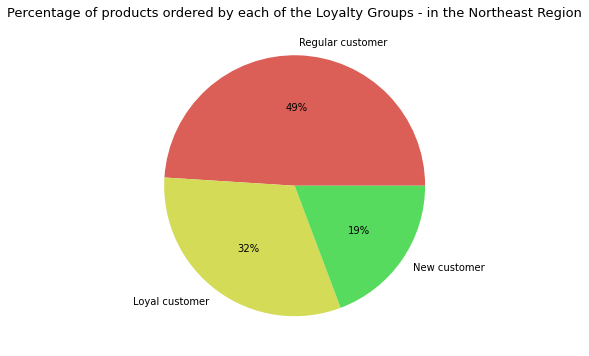

In [36]:
##Pie chart of the Percentage of products ordered by each of the Loyalty Groups - in the Northeast Region
k_grp = df10wdepts['loyalty_flag'].value_counts().plot.pie(figsize = (8,6), colors = sns.color_palette('hls', 6), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Percentage of products ordered by each of the Loyalty Groups - in the Northeast Region',fontsize=13)
plt.show()

### 22. Creating Charts - Top Departments - By Region

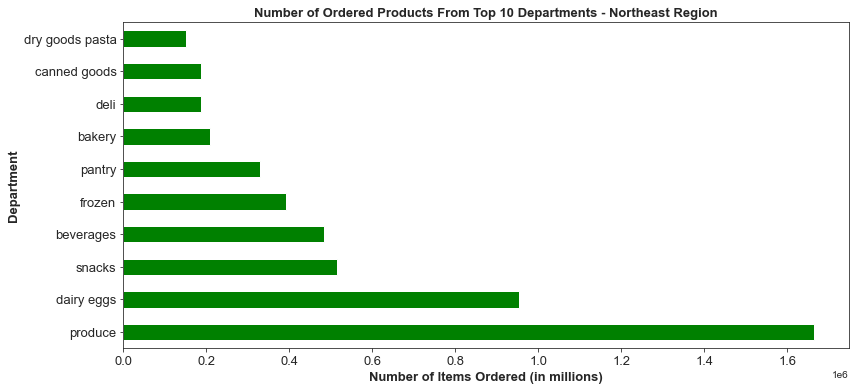

In [66]:
#Creating a bar chart of Top 10 departments in the Northeast Region
top_10_depts_northeast = northeast['department_name'].value_counts().nlargest(10).plot.barh(figsize = (13,6), color = ['green'])
sns.set_style('ticks')
plt.xlabel('Number of Items Ordered (in millions)', fontsize = 13, fontweight = 'bold')
plt.ylabel('Department', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Number of Ordered Products From Top 10 Departments - Northeast Region', fontsize = 13, fontweight = 'bold')
plt.show()

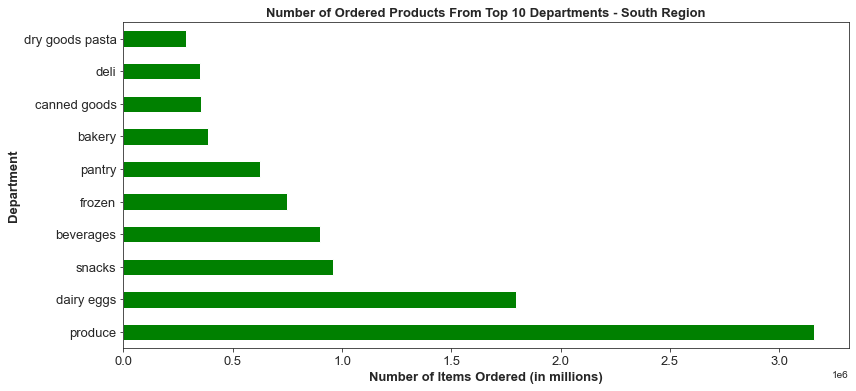

In [67]:
#Creating a bar chart of Top 10 departments in the South Region
top_10_depts_south = south['department_name'].value_counts().nlargest(10).plot.barh(figsize = (13,6), color = ['green'])
sns.set_style('ticks')
plt.xlabel('Number of Items Ordered (in millions)', fontsize = 13, fontweight = 'bold')
plt.ylabel('Department', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Number of Ordered Products From Top 10 Departments - South Region', fontsize = 13, fontweight = 'bold')
plt.show()

In [68]:
#Saving images of the 2 bar charts
top_10_depts_northeast.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_top_10_depts_northeast.png'))
top_10_depts_south.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_top_10_depts_south.png'))

### 23. Creating Charts - Orders in each Dept, by Region

In [81]:
#Creating a crosstab to establish if there is a correlation between region and departments
ctab_department_region = pd.crosstab(df10wdepts['department_name'], df10wdepts['region'], dropna = False)

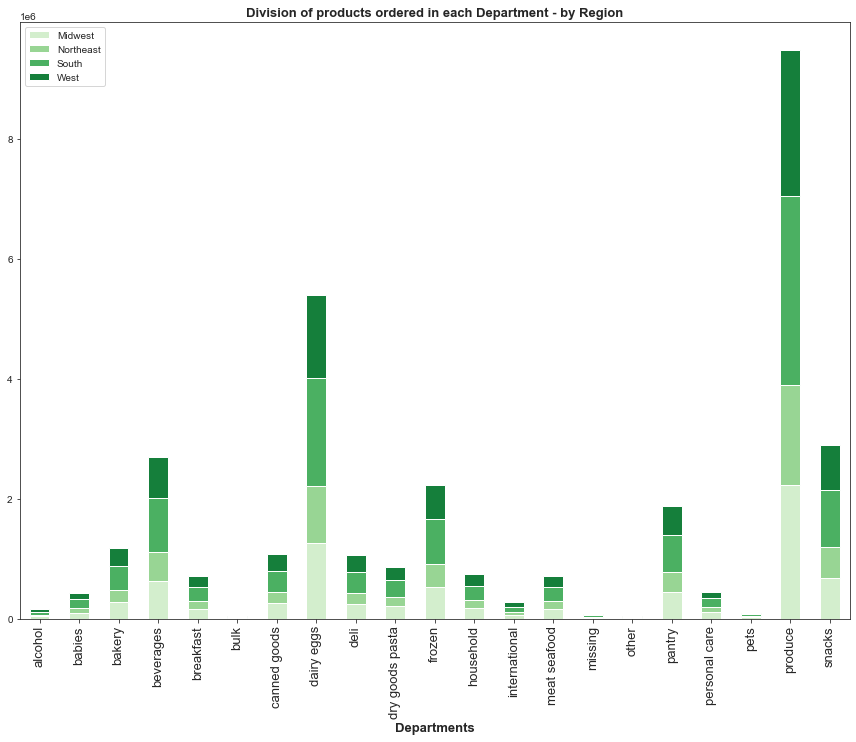

In [82]:
#Creating a stacked bar chart of the departments, divided up by the regions
ctab = ctab_department_region.plot(kind = 'bar', figsize = (12,10), stacked = True, color = sns.color_palette('Greens', 4))
plt.legend(loc='upper left')
plt.tight_layout()
plt.xlabel('Departments', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.title('Division of products ordered in each Department - by Region', fontsize = 13, fontweight = 'bold')
plt.show()

In [83]:
#Saving image of the bar chart
ctab.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'fc_dept_regions.png'))

In [56]:
#Creating a subset of the individual products
df10ex_prods_unique = df10ex.drop_duplicates(subset = ["product_id"])

In [57]:
#Rechecking the flag count
df10ex_prods_unique['price_range_loc'].value_counts(dropna = False)

Mid-range product     32822
Low-range product     16290
High-range product      545
Name: price_range_loc, dtype: int64

### 24. Task for CFO
#### The CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.
##### -- Using the full dataframe as there is no need to see any percentage of customers. --

In [84]:
#Creating the flag for low orders customer and high orders customer
df10wdepts.loc[df10wdepts['max_order'] < 5, 'low_orders_flag'] = 'low orders'
df10wdepts.loc[df10wdepts['max_order'] >= 5, 'low_orders_flag'] = 'good orders'

In [85]:
#Confirming the flag is working
df10wdepts['low_orders_flag'].value_counts(dropna = False)

good orders    30959687
low orders      1440045
Name: low_orders_flag, dtype: int64

In [86]:
#Checking to find if 'low_orders_flag' column has any Null entries
df10wdepts.isnull().sum()

order_id                              0
user_id                               0
order_number                          0
orders_day_of_week                    0
order_hour_of_day                     0
days_since_prior_order          2075745
first_order                           0
product_id                            0
reordered                             0
product_name                          0
aisle_id                              0
department_id                         0
prices                                0
price_range_loc                       0
busiest_day                           0
busiest_period_of_day                 0
max_order                             0
loyalty_flag                          0
spend_group                           0
spend_flag                            0
days_since_last_order_median          5
order_frequency_flag                  5
gender                                0
state                                 0
age                                   0


In [88]:
#Creating a subset with just the 'good orders' customers
good_orders_customers = df10wdepts[df10wdepts['low_orders_flag'] == 'good orders']

In [89]:
#Exporting the 'good orders' customers subset to Pickle file
good_orders_customers.to_pickle(os.path.join(path,'02 Data','Prepared Data','good_orders_customers.pkl'))

### 25. Exporting final dataframe

In [90]:
#Exporting the final dataframe
df10wdepts.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_10_with_depts.pkl'))